# **Allah**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
# get desired colum for operation
df_n = df[['petal length (cm)','petal width (cm)']]
df_n.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [39]:
df_n.rename(columns={'petal length (cm)':'petal_length_(cm)'},inplace =True)
df_n.rename(columns={'petal width (cm)':'petal_width_(cm)'},inplace =True)
df_n.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8860\2644647349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.rename(columns={'petal length (cm)':'petal_length_(cm)'},inplace =True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8860\2644647349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.rename(columns={'petal width (cm)':'petal_width_(cm)'},inplace =True)


,petal_length_(cm),petal_width_(cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


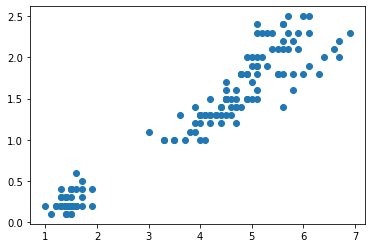

In [40]:
plt.scatter(df_n['petal_length_(cm)'],df_n['petal_width_(cm)'])

In [45]:
# df_n.rename(columns={'petal length (cm)':'petal_length_(cm)'},inplace =True)
# df_n.rename(columns={'petal width (cm)':'petal_width_(cm)'},inplace =True)
# df_n.head()

In [42]:
# X and y Axis is not Normalize we do first Normalize with MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_n[['petal_length_(cm)']])
df_n['petal_length_(cm)'] = scaler.transform(df_n[['petal_length_(cm)']])
df_n.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8860\2673958391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['petal_length_(cm)'] = scaler.transform(df_n[['petal_length_(cm)']])


,petal_length_(cm),petal_width_(cm)
0,0.067797,0.2
1,0.067797,0.2
2,0.050847,0.2
3,0.084746,0.2
4,0.067797,0.2


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_n[['petal_width_(cm)']])
df_n['petal_width_(cm)'] = scaler.transform(df_n[['petal_width_(cm)']])
df_n.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8860\2368337072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['petal_width_(cm)'] = scaler.transform(df_n[['petal_width_(cm)']])


,petal_length_(cm),petal_width_(cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


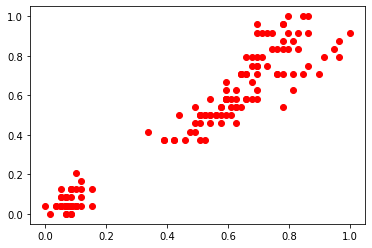

In [46]:
plt.scatter(df_n['petal_length_(cm)'],df_n['petal_width_(cm)'],color ='red')

# **Elbow Plot**

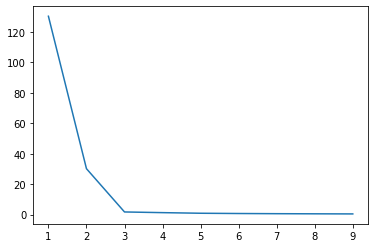

In [91]:
# first we find how many cluster Required so we use Elbow method
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    # km.fit(df_n[['petal_length_(cm)','petal_width_(cm)']])
    km.fit(df_n)
    sse.append(km.inertia_)
plt.plot(k_rng,sse)

In [92]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
# y_predicted = km.fit_predict(df_n[['petal_length_(cm)','petal_width_(cm)']])
y_predicted = km.fit_predict(df_n)
df_n['Cluster_op'] = y_predicted

C:\Users\DELL\AppData\Local\Temp\ipykernel_8860\3220976891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['Cluster_op'] = y_predicted


In [93]:
df_n.head()

,petal_length_(cm),petal_width_(cm),Cluster_op
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [96]:
len(df_n)

150

In [97]:
df_n.Cluster_op.unique()

array([1, 2, 0])

In [98]:
df_n.Cluster_op.value_counts()

2    52
1    50
0    48
Name: Cluster_op, dtype: int64

In [99]:
df0 = df_n[df_n.Cluster_op==0]
df1 = df_n[df_n.Cluster_op==1]
df2 = df_n[df_n.Cluster_op==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


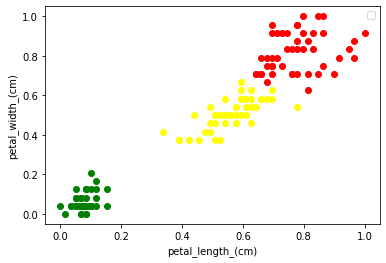

In [101]:
plt.xlabel('petal_length_(cm)')
plt.ylabel('petal_width_(cm)')
plt.legend()
plt.scatter(df0['petal_length_(cm)'],df0['petal_width_(cm)'],color = 'red')
plt.scatter(df1['petal_length_(cm)'],df1['petal_width_(cm)'],color = 'green')
plt.scatter(df2['petal_length_(cm)'],df2['petal_width_(cm)'],color = 'yellow')


In [102]:

# Exercise for k means tutorial
# Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
# Figure out if any preprocessing such as scaling would help here
# Draw elbow plot and from that figure out optimal value of k
# from sklearn.cluster import KMeans
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from matplotlib import pyplot as plt
# from sklearn.datasets import load_iris
# %matplotlib inline
# iris = load_iris()
# df = pd.DataFrame(iris.data,columns=iris.feature_names)
# df.head()
# sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
# 0	5.1	3.5	1.4	0.2
# 1	4.9	3.0	1.4	0.2
# 2	4.7	3.2	1.3	0.2
# 3	4.6	3.1	1.5	0.2
# 4	5.0	3.6	1.4	0.2
# df['flower'] = iris.target
# df.head()
# sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)	flower
# 0	5.1	3.5	1.4	0.2	0
# 1	4.9	3.0	1.4	0.2	0
# 2	4.7	3.2	1.3	0.2	0
# 3	4.6	3.1	1.5	0.2	0
# 4	5.0	3.6	1.4	0.2	0
# df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
# df.head(3)
# petal length (cm)	petal width (cm)
# 0	1.4	0.2
# 1	1.4	0.2
# 2	1.3	0.2
# km = KMeans(n_clusters=3)
# yp = km.fit_predict(df)
# yp
# array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#        0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#        2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
#        2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
#        1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
# df['cluster'] = yp
# df.head(2)
# petal length (cm)	petal width (cm)	cluster
# 0	1.4	0.2	0
# 1	1.4	0.2	0
# df.cluster.unique()
# array([0, 2, 1], dtype=int64)
# df1 = df[df.cluster==0]
# df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]
# plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
# plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
# plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
# <matplotlib.collections.PathCollection at 0x124cdf8c908>

# Elbow Plot

# sse = []
# k_rng = range(1,10)
# for k in k_rng:
#     km = KMeans(n_clusters=k)
#     km.fit(df)
#     sse.append(km.inertia_)
# plt.xlabel('K')
# plt.ylabel('Sum of squared error')
# plt.plot(k_rng,sse)
# [<matplotlib.lines.Line2D at 0x124ce45fc88>]
